In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize


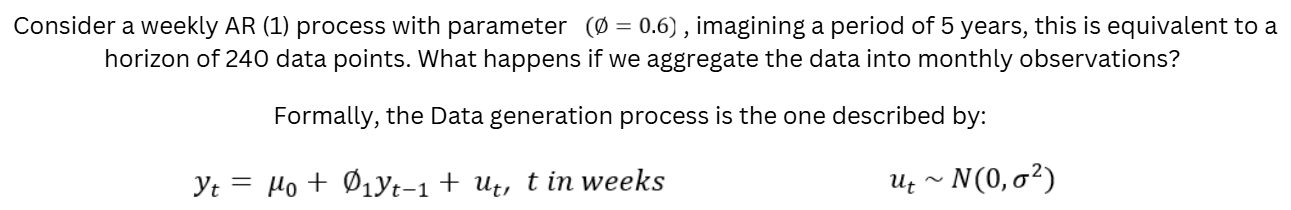

Weekly sales will be generated assiging values to the parameters in the above formulation. The data simulation is straightforward. Care should be taken in intializing the first observation, sice an AR(1) process with a terrible intialization will create unnecessary strange values.

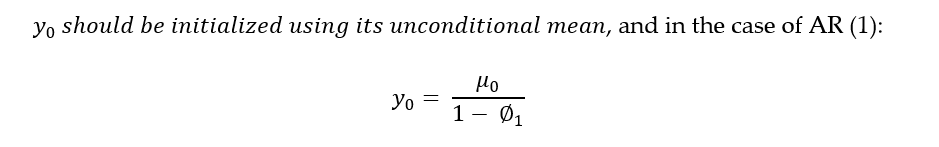

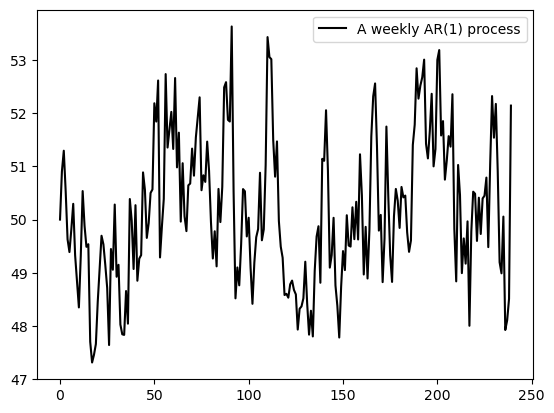

In [48]:
mu0 = 10
phi_1 = 0.8
sigma = 1
y_0 = mu0/(1-phi_1) #Where the process starts
T = 240
y = np.zeros(T)
y[0] = y_0
for i in range(len(y)-1):
    y[i+1] = phi_1*y[i] + mu0 +  np.random.normal(0,sigma)

plt.plot( np.arange(T), y, label='A weekly AR(1) process' , color = 'black')
plt.legend()
plt.show()


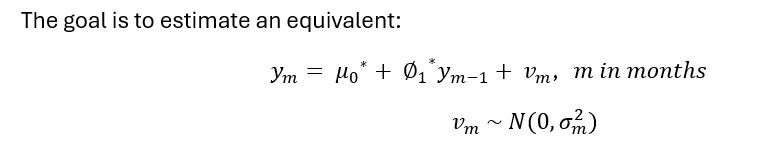

But first the data aggreagtion is implemented

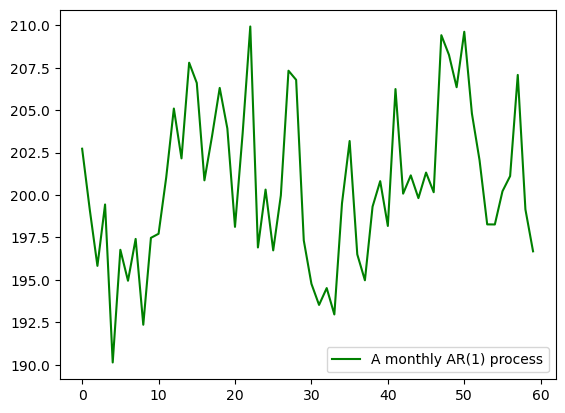

In [49]:
#Creating the equivalent monthly sales:
m =int(T/4)
y_agg = np.zeros(m)
j = 0 
for i in range(m):
  y_agg[i] = y[i+j] + y[i+j+1] + y[i+j+2] + y[i+j+3]
  j = j + 3

plt.plot( np.arange(m ), y_agg, label='A monthly AR(1) process' , color = 'green')
plt.legend()
plt.show()



Definition of the maximum likelihood estimator:

In [50]:
def log_likelihood(p,x):
    mu0_hat = p[0]
    phi_hat = p[1]
    sigma_hat = p[2]
    l = -0.5*(len(x)-1)*np.log(2*np.pi) - 0.5*(len(x)-1)*np.log(sigma_hat**2) - np.sum(((x[1:]-mu0_hat - phi_hat*x[:-1])**2)/(2*sigma_hat**2))
    return -l

First, trying the estimator on the original weekly data

In [51]:
mu00 = np.sum(y)/len(y)
sigma11 = np.sum((y-mu00)**2)/(len(y)-1)
p0 = [mu00,0.5,sigma11] # the vector of parameters is now of size 3
ll = log_likelihood(p0,y)
ll

22442.997733873464

The estimator is fairly able to retrive the true parameters as expected since up untill now it's just a typical estimation of an AR(1) process.

In [52]:
minimize(log_likelihood, p0, args= (y,) )

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 327.30442727641207
        x: [ 1.421e+01  7.169e-01  9.517e-01]
      nit: 31
      jac: [-3.815e-06  0.000e+00 -3.815e-06]
 hess_inv: [[ 2.424e-03 -6.255e-05 -2.128e-03]
            [-6.255e-05  3.039e-06  5.033e-05]
            [-2.128e-03  5.033e-05  1.928e-03]]
     nfev: 144
     njev: 36

Now, the estimator is applied to the monthly aggregated data and its can be seen the autoregressive parameter can't be retrived. Running more trials one can see the issue clearly.

In [53]:
mu00 = np.sum(y_agg)/len(y_agg)
sigma11 = np.sum((y_agg-mu00)**2)/(len(y_agg)-1)
p0 = [mu00,0.5,sigma11] # the vector of parameters is now of size 3
minimize(log_likelihood, p0, args= (y_agg,) )

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 166.59754454770163
        x: [ 1.023e+02  4.898e-01 -4.075e+00]
      nit: 22
      jac: [ 0.000e+00  7.629e-05  0.000e+00]
 hess_inv: [[ 1.930e-01 -9.733e-04 -1.865e-01]
            [-9.733e-04  1.216e-05  9.337e-04]
            [-1.865e-01  9.337e-04  1.856e-01]]
     nfev: 180
     njev: 45

The inability to retrieve the true microparameter when the data is aggregated (using macro-data) has an important consequence on monitoring the business performance. Being aware of the true frequency of purchase is crucial for estimating the “persistence of habits” represented by the autoregressive parameter.